<h1>contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Create-Simple-Model" data-toc-modified-id="Create-Simple-Model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Create Simple Model</a></span></li><li><span><a href="#Convert-Model-to-JSON" data-toc-modified-id="Convert-Model-to-JSON-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convert Model to JSON</a></span></li><li><span><a href="#JSON-to-YAML" data-toc-modified-id="JSON-to-YAML-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>JSON to YAML</a></span></li><li><span><a href="#Test-YAML-ized-model" data-toc-modified-id="Test-YAML-ized-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Test YAML-ized model</a></span></li></ul></div>

# Save, Convert, Test Model

## Create Simple Model

In [1]:
!rm -rf Detector.mat Log.txt octave-workspace

In [2]:
clc;
clear;
addpath(genpath('octave'));
opts=acfTrain();
opts.posWinDir = 'images/simple/posWinDir/';
opts.negWinDir = 'images/simple/negWinDir/';
opts.modelDs = [19  19];
opts.modelDsPad = [20  20];
model = acfTrain(opts);

---------------------------------------------------------------------------
Training stage 0
Done sampling windows (time=0s).
Computing lambdas... done (time=1s).
Extracting features... done (time=0s).
Done sampling windows (time=0s).
Extracting features... done (time=0s).
Training AdaBoost: nWeak=128 nFtrs=250 pos=88 neg=3
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 column 16
    adaBoostTrain at line 84 column 31
    acfTrain at line 200 column 16
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 column 16
    adaBoostTrain at line 84 column 31
    acfTrain at line 200 column 16
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 column 16
    adaBoostTrain at line 84 column 31
    acfTrain at line 200 column 16
    binaryTreeTrain at line 114 column 8
    adaBoostTrain at line 79 column 17
    acfTrain at line 200 co

## Convert Model to JSON

In [3]:
simple_model_json = savejson('simple_model',model);

In [4]:
json_file = fopen('simple_model.json', 'w');
fdisp(json_file, simple_model_json);
fclose(json_file);

In [5]:
!ls simple_model.json

simple_model.json


In [6]:
!head -4 simple_model.json

{
	"simple_model": {
		"opts": {
			"pPyramid": {


## JSON to YAML

In [7]:
!python python/json_2_yaml.py simple_model.json simple_model

In [8]:
!ls simple_model.json.2.yaml

simple_model.json.2.yaml


In [9]:
!head -7 simple_model.json.2.yaml

%YAML 1.0
---
simple_model:
    format: 3
    pyramid:
        channel_features:
            shrink: 4


## Test YAML-ized model

In [10]:
!./detector.bin simple_model.json.2.yaml images/theron.png 0

processing singel image
5 total bounding boxes 
saving cropped image file:  cropped_theron_score_95.094994.png
1 bounding boxes meet score criteria
saving scored image file:  0_scored_theron.png
complete with no errors


In [16]:
!ls *.png

cropped_theron_score_95.094994.png	scored_theron.png


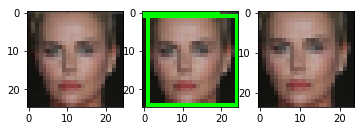

In [12]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
images.append(mpimg.imread('images/theron.png'))
for img_path in glob.glob('*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(10,10))
columns = 5
for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)

scored

In [15]:
!sips -g pixelHeight -g pixelWidth images/theron.png

/Users/Bhill/git/Computer_Vision_Object_Detection/images/theron.png
  pixelHeight: 25
  pixelWidth: 25


<img src="scored_theron.png" alt="Drawing" style="width: 200px;"/>  

detection cropped

In [16]:
!sips -g pixelHeight -g pixelWidth cropped_theron_score_95.094994.png

/Users/Bhill/git/Computer_Vision_Object_Detection/cropped_theron_score_95.094994.png
  pixelHeight: 24
  pixelWidth: 24


<img src="cropped_theron_score_95.094994.png" alt="Drawing" style="width: 200px;"/>  